<a href="https://colab.research.google.com/github/AnamayaSaraogi/Human-Face-Recognition-Model/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file explains how to directly implement the human face recognition model using the `face_recognition.keras` file available in this GitHub repository.

In [1]:
import requests
from tensorflow.keras.models import load_model

# Correct raw GitHub URL to the .keras file
url = 'https://raw.githubusercontent.com/AnamayaSaraogi/face-recognition/main/face_recognition.keras'

# Download the file
response = requests.get(url)
with open('face_recognition.keras', 'wb') as f:
    f.write(response.content)

# Load the model
model1 = load_model('face_recognition.keras')

print("Model loaded successfully!")

Model loaded successfully!


Saving man.jpg to man.jpg


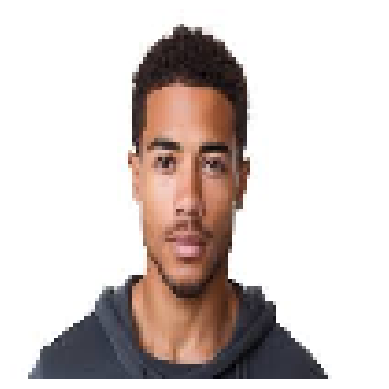

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
It is a human face.


In [2]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(100, 100))  # Resize the image
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array, img  # Return the original image as well for displaying

# Upload the image
uploaded = files.upload()

# Get the uploaded image file path (it will be available in the current directory)
image_path = list(uploaded.keys())[0]

# Preprocess the image and make a prediction
test_image, original_img = preprocess_image(image_path)

# Display the uploaded image
plt.imshow(original_img)
plt.axis('off')  # Hide axes for a clean display
plt.show()

# Make a prediction
prediction = model1.predict(test_image)

# Inverse the logic if needed
if prediction[0] < 0.5:
    print("It is a human face.")
else:
    print("It is not a human face.")
